<a href="https://colab.research.google.com/github/Adhira-Deogade/INFO-7374---Assignment-3/blob/master/Expt1_BoW_Countvectoriser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
ls

 cleanedfinancial_data.csv   JGEPart1.txt         Part1-GE.json
 FinalFiles/                'Part1-GE (1).json'   sample_data/


In [0]:
import pandas as pd

In [0]:
# Importing the dataset
reviews = pd.read_csv("cleanedfinancial_data.csv")
X,y = reviews.text,reviews.sentiment

In [6]:
X.head()

0    Good day, ladies and gentlemen, and welcome to...
1    I'm not sure. I think Model T was a little bit...
2    Well, we need to bring the Shanghai factory on...
3    So it's - it is eligible for that. But it soun...
4    The demand for - the demand for Model 3 is ins...
Name: text, dtype: object

In [0]:
# Pickling the dataset
with open('X.pickle','wb') as f:
    pickle.dump(X,f)
    
with open('y.pickle','wb') as f:
    pickle.dump(y,f)

In [0]:
# Unpickling dataset
X_in = open('X.pickle','rb')
y_in = open('y.pickle','rb')
X = pickle.load(X_in)
y = pickle.load(y_in)

In [0]:
# Creating the corpus
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review) 

In [0]:
# Creating the BOW model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()


In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
y.head()

0     neutral
1    negative
2    negative
3     neutral
4    positive
Name: sentiment, dtype: object

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [16]:
# Training the classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(text_train,sent_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# Testing model performance
sent_pred = classifier.predict(text_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(sent_test, sent_pred)

In [18]:
cm

array([[  5,  17,  12],
       [  3, 133,  29],
       [  3,  41,  87]])

In [0]:
import matplotlib.pyplot as plt

In [24]:
y.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [0]:
text_labels = y.unique()

In [0]:
import itertools

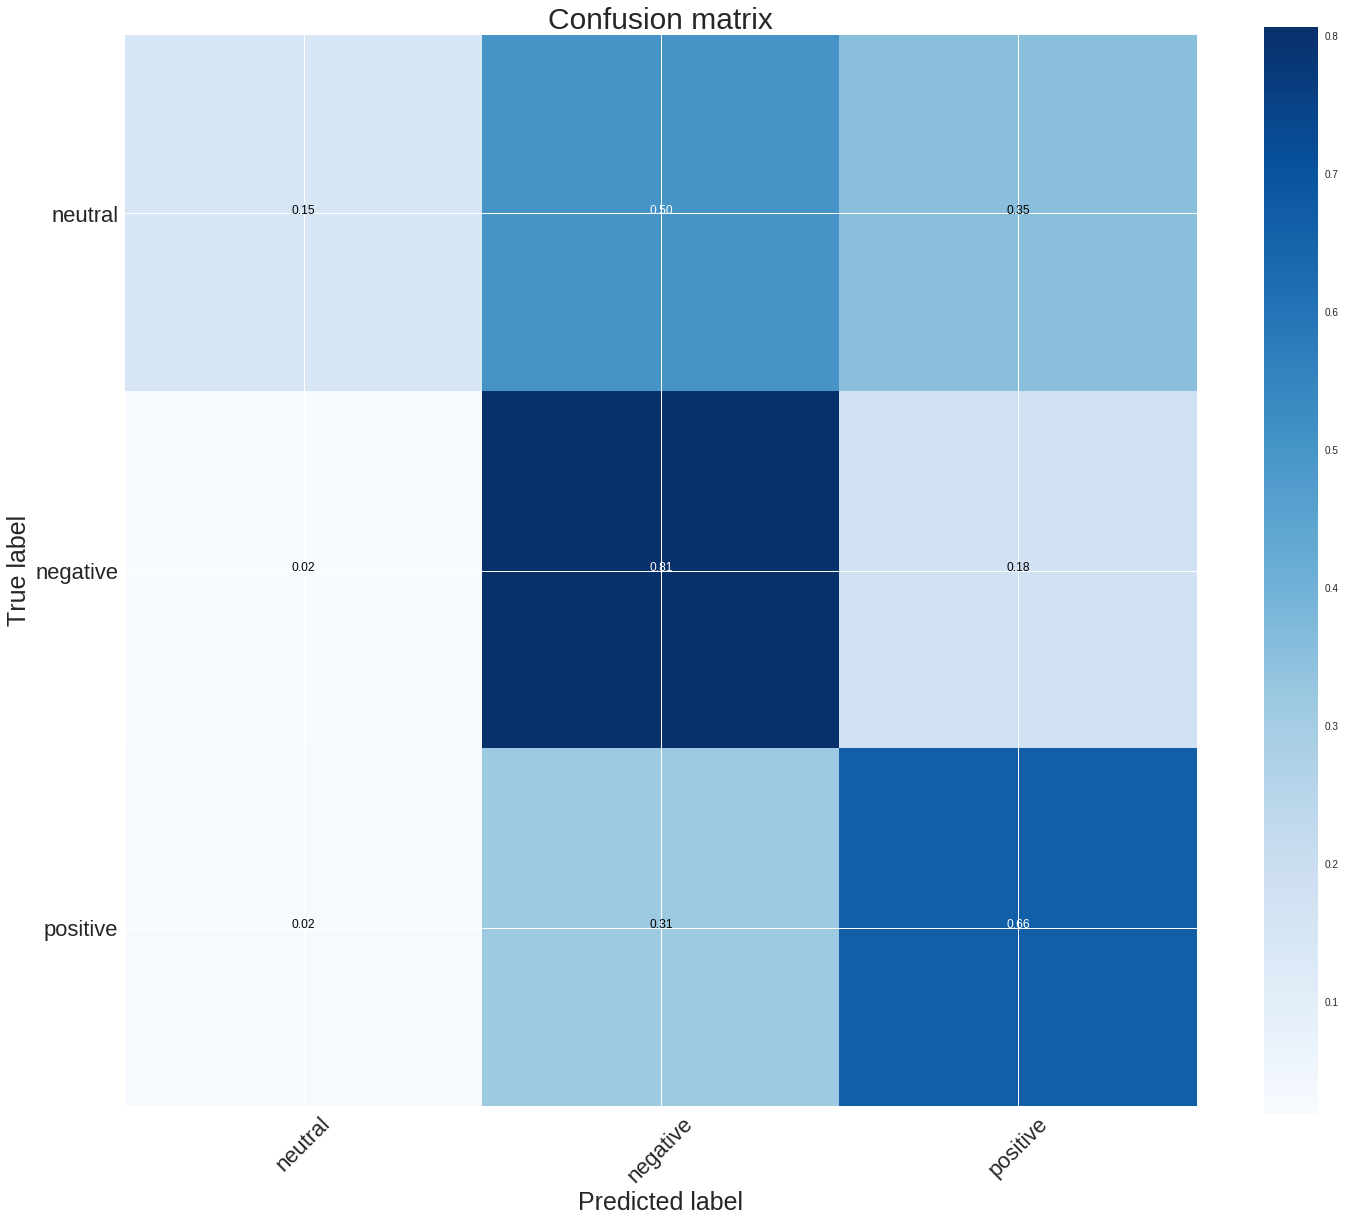

In [29]:
plt.figure(figsize=(24,20))
plot_confusion_matrix(cm, classes=text_labels, title="Confusion matrix")
plt.show()